## Árvores de decisão

##### Por quê árvores?
Árvores de decisão são extremamente prevalentes em _machine learning_, servindo tanto como um modelo por si só como "bloquinhos" para construção de modelos mais robustos. Quando usada como um modelo _standalone_, as árvores são facilmente interpretadas e são de fácil comunicação para negócios, com uma heurística transparente, atuável e auditável. Um exemplo dessa propriedade é quando precisamos _explicar_ o porquê de uma previsão, e não somente efetuar a previsão - com uma árvore podemos facilmente encontrar o caminho que a amostra percorreu e comparar com as outras amostras na mesma folha.

Quando usadas como parte de modelos mais complexos, a alta flexibilidade das árvores via hiperparâmetros e seu rápido ajuste são alavancados para mitigar as fraquezas das árvores.

Além disso, modelos baseados em árvores não necessitam de padronização dos dados, o que faz desta técnica um ótimo _baseline_ para comparação, isto é, um primeiro modelo a ser ajustado sobre um dataset para que os modelos subsequentemente testados possam ser comparados com.

Também é comum utilizar modelos de árvores em problemas de alta dimensionalidade para fazer a seleção de variáveis: ajustamos uma(s) árvore(s) e olhamos pra importância de cada variável na árvore, isto é, o ganho de informação sobre a variável resposta que temos quando sabemos algo sobre a variável explicativa. As variáveis mais importantes na árvore são então alimentadas em um modelo mais robusto e custoso para treinamento.


Na prática, acabamos utilizando árvores de decisão puras mais como uma ferramenta do que como um modelo propriamente dito. Entretanto, a simplicidade da técnica é extremamente desejada a depender da necessidade de negócio.
<br><br>
<div>
    <!-- <img src="attachment:image.png" width="600"> -->
</div>

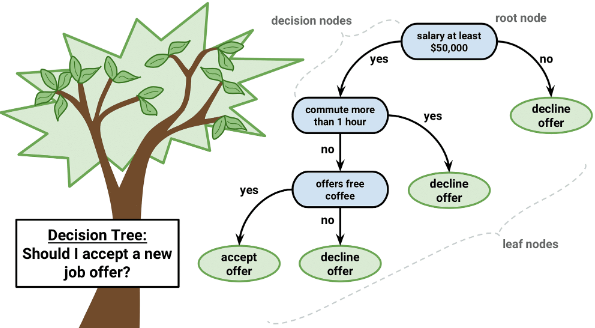

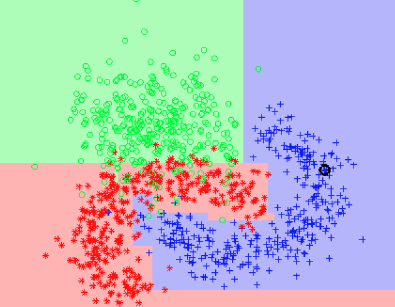<br />
Exemplo de fronteiras de decisão de uma árvore

<!-- <div><center>
    <img src="attachment:image.png" width="400">
    <br />
    <i>Exemplo de fronteiras de decisão de uma árvore</i>
    </center></div> -->

As árvores de decisão podem ser usadas tanto para classificação quanto para regressão, e em ambos os casos são treinadas seguindo a mesma heurística. Seu comportamento pode ser controlado limitando, entre outros, a quantidade de amostras mínima por folha, o ganho mínimo de informação das quebras, a profundidade máxima ou até a quantidade de folhas. O controle desses hiperparâmetros é uma forma de regularização (imposição de restrições) nas árvores de decisão e ajuda a manter o _overfitting_ sob controle.

Resumindo, em forma de lista:
Vantagens:
- Fáceis de entender e interpretar; árvores podem ser visualizadas
- Requer pouco dataprep (não há necessidade de padronização e algumas implementações lidam com nulos automaticamente)
- Custo de inferência da ordem de O(log n)
- Lidam com variáveis numéricas e categóricas (só numéricas na implementação do sklearn)
- Suportam problemas de mais de 2 classes automaticamente, por definição
- Tem bom desempenho mesmo em situações não-ótimas (premissas violadas)

Desvantagens:
- Extremamente fáceis e sensíveis ao overfitting
- Muito sensíveis aos dados de treino - reamostrar a divisão treino-teste pode produzir uma árvore muito diferente
- Limitadas para extrapolação por ter um conjunto _finito_ de valores preditos possíveis (qtd. folhas)
- Sensível a classes não-balanceadas (mais volume de uma do que das outras)
- Encontrar a árvore ótima é um problema NP-completo; implementações utilizam abordagens _greedy_ que produzem ótimos locais.

##### Exemplo
Vamos carregar novamente o dataset _iris_ e ajustar algumas árvores de decisão sobre ele. Vamos utilizar também a função _plot_tree()_ do _sklearn_ para visualizar nossas árvores.

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.columns = [c.replace('.', '_') for c in df.columns]

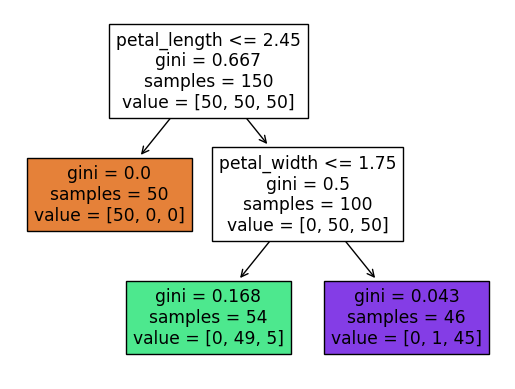

In [24]:
# Não separaremos em treino-teste pois é somente uma demonstração inicial
# Árvore curta, profundidade 2
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['variety']);
plot_tree(tree, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], filled=True);

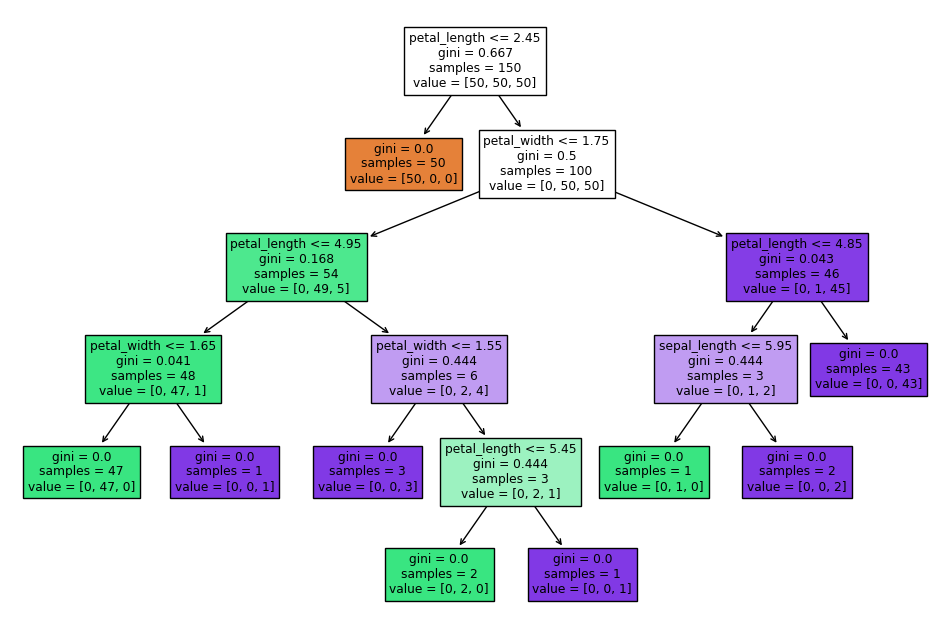

In [25]:
import matplotlib.pyplot as plt
# Árvore mais longa, profundidade 5
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['variety']);
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], filled=True);

#### Heurística
As árvores de decisão são construídas de maneira recursiva:
- Começamos com o dataset de treino completo, com todas as variáveis
- Elencamos a melhor variável $x$ para efetuar uma quebra
    - O critério utilizado para "melhor variável" é paramétrico e _normalmente_ é a impureza de Gini ou entropia para classificação e MSE (ou inércia unidimensional) para regressão
    - Uma quebra só é válida se satisfizer as restrições dos hiperparâmetros (e.g. quantidade mínima de amostras por folha)
- Elencamos o melhor valor $c$ para quebrar aquela variável
    - Seguindo o mesmo critério anterior, Gini ou entropia
- Separamos o dataset de treino em dois conjuntos:
    - Um conjunto onde as amostras têm $x <= c$
    - Um conjunto onde as amostras têm $x > c$
- Repetimos o algoritmo para cada um dos conjuntos formados.

<br>
Curiosidade: apesar de parecer muito razoável árvores não-binárias, isto é, que quebram em mais de dois conjuntos por nó, na prática elas não são utilizadas por um motivo muito simples: toda árvore de decisão pode ser representada por uma árvore binária. Dessa forma, um algoritmo que constrói árvores binárias consegue construir uma representação de qualquer árvore não-binária, o que é suficiente para resolver a maior parte dos problemas.

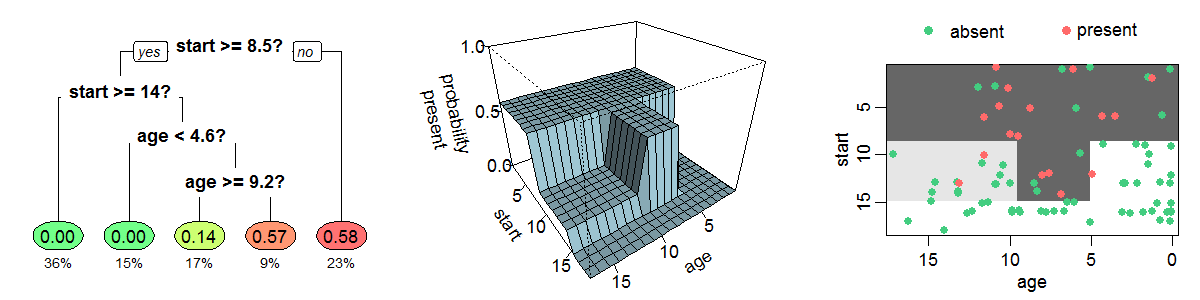
<center><i>https://en.wikipedia.org/wiki/Decision_tree_learning</i></center>

### Classificação
##### Impureza de Gini

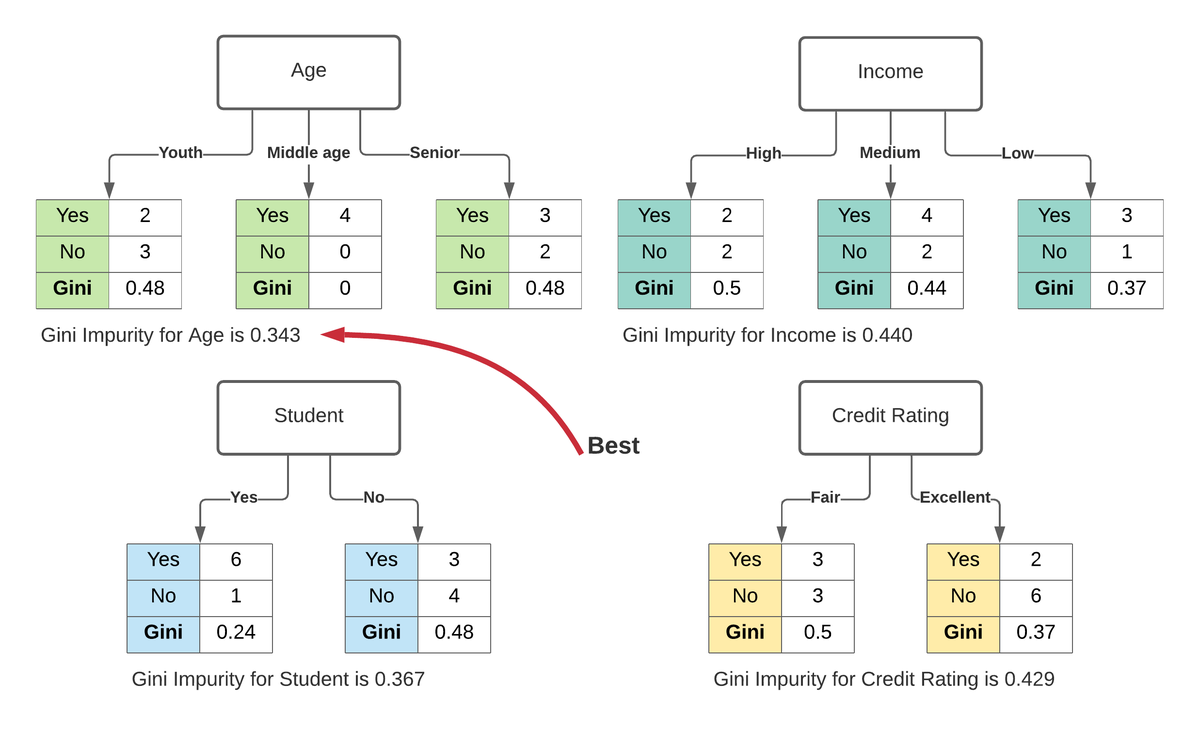

Vamos definir formalmente a impureza de Gini do dataset:

$$\large{Gini(D) = 1- \sum_{i=1}^k p_{i}^{2}}$$

Nesta equação, $p_{i}$ representa a probabilidade (proporção) da classe $i$ no dataset. Note que um dataset com somente uma classe tem $Gini(D) = 0$ e um dataset com metade de cada classe tem $Gini(D) = 0.5$. Quando fazemos uma quebra e obtemos dois datasets, podemos calcular a impureza da seguinte forma:

$$\large{Gini_{A} (D) = \frac {n_1}{n} Gini(D_1) + \frac {n_2}{n} Gini(D_2)}$$

E o ganho de informação referente à quebra $A$ como:

$$\large{\triangle Gini(A) = Gini(D)- Gini_A(D)}$$

Durante o treinamento da árvore, escolheremos a variável e valor que nos dão a maior diferença de impureza.

##### Entropia
A definição de entropia para as árvores de decisão é similar à definição do Gini e possui praticamente o mesmo comportamento:

$$\large{H(D) = \sum_{i=1}^n -p_{i}\ log_{2}(p_{i})}$$

### Regressão
##### MSE ou inércia ou variância da folha
Para regressão, definiremos a variância total do dataset como o erro quadrático quando usamos a média da target como preditor:

$$\large{e(D) = MSE(y_{true}, \hat{y})}$$

E definimos a qualidade de uma quebra como a diferença de variância entre o conjunto origem e os dois resultantes da quebra:
<br><br>
$$\large{\triangle e(A) = e(D_1) - (e(D_1) + e(D_2))}$$

<br><br>

Vamos aplicar árvores de decisão no dataset _Census income_ da aula anterior e comparar o desempenho conforme variamos alguns hiperparâmetros:

##### Census income

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Census income
from ucimlrepo import fetch_ucirepo
census_income = fetch_ucirepo(id=20)
df = pd.concat([census_income.data.features, census_income.data.targets], axis=1)
df['income'] = df['income'].apply(lambda s: s[:-1] if s[-1]=='.' else s)
df.dropna(how='any', inplace=True)
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df = pd.get_dummies(df, columns=cat_vars)
df['income'] = df['income'].apply(lambda x: 1 if x[0]=='>' else 0)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1312)
model_cols = [c for c in df.columns if c!='income']

In [27]:
# Profundidade máxima = 5
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(df_train[model_cols], df_train['income'])
df_train['preds_prob'] = tree.predict_proba(df_train[model_cols])[:,1]
df_test['preds_prob'] = tree.predict_proba(df_test[model_cols])[:,1]
print('ROC-AUC (treino):', roc_auc_score(df_train['income'], df_train['preds_prob']))
print('ROC-AUC (teste):', roc_auc_score(df_test['income'], df_test['preds_prob']))

ROC-AUC (treino): 0.891799878296648
ROC-AUC (teste): 0.887424012418649


In [28]:
# Profundidade máxima = 10
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(df_train[model_cols], df_train['income'])
df_train['preds_prob'] = tree.predict_proba(df_train[model_cols])[:,1]
df_test['preds_prob'] = tree.predict_proba(df_test[model_cols])[:,1]
print('ROC-AUC (treino):', roc_auc_score(df_train['income'], df_train['preds_prob']))
print('ROC-AUC (teste):', roc_auc_score(df_test['income'], df_test['preds_prob']))

ROC-AUC (treino): 0.9267650667787746
ROC-AUC (teste): 0.901387216492609


In [29]:
# Profundidade máxima = 15
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(df_train[model_cols], df_train['income'])
df_train['preds_prob'] = tree.predict_proba(df_train[model_cols])[:,1]
df_test['preds_prob'] = tree.predict_proba(df_test[model_cols])[:,1]
print('ROC-AUC (treino):', roc_auc_score(df_train['income'], df_train['preds_prob']))
print('ROC-AUC (teste):', roc_auc_score(df_test['income'], df_test['preds_prob']))

ROC-AUC (treino): 0.9591545617844799
ROC-AUC (teste): 0.8524299011853724


In [30]:
# Profundidade máxima = 10, qtd mínima de amostras para quebra = 10
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10)
tree.fit(df_train[model_cols], df_train['income'])
df_train['preds_prob'] = tree.predict_proba(df_train[model_cols])[:,1]
df_test['preds_prob'] = tree.predict_proba(df_test[model_cols])[:,1]
print('ROC-AUC (treino):', roc_auc_score(df_train['income'], df_train['preds_prob']))
print('ROC-AUC (teste):', roc_auc_score(df_test['income'], df_test['preds_prob']))

ROC-AUC (treino): 0.9254822186061609
ROC-AUC (teste): 0.9039083588692227


In [31]:
# Profundidade máxima = 10, qtd mínima de amostras para quebra = 10
# e classes ponderadas
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=6, class_weight='balanced')
tree.fit(df_train[model_cols], df_train['income'])
df_train['preds_prob'] = tree.predict_proba(df_train[model_cols])[:,1]
df_test['preds_prob'] = tree.predict_proba(df_test[model_cols])[:,1]
print('ROC-AUC (treino):', roc_auc_score(df_train['income'], df_train['preds_prob']))
print('ROC-AUC (teste):', roc_auc_score(df_test['income'], df_test['preds_prob']))

ROC-AUC (treino): 0.9266730431002269
ROC-AUC (teste): 0.8982575646766086


### EXERCÍCIOS

- O que acontece se deixarmos uma árvore crescer infinitamente, sem nenhum critério de parada ou regularização?
- Por quê a fronteira de decisão da árvore é formada por retas perpendiculares aos eixos?
- Treine uma árvore de decisão para um dataset de sua escolha do repositório da UCI (https://archive.ics.uci.edu/) ou das aulas anteriores. Explore hiperparâmetros diferentes (ver documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e tente extrair o máximo de desempenho da técnica sem overfittar, comparando o desempenho no conjunto de treino e teste. 
- Treine 3 árvores de decisão para o dataset o mesmo dataset (_Census income_, aula 04) utilizando um conjunto de variáveis diferentes para cada árvore, como por exemplo, amostrando aleatoriamente metade das variáveis para cada árvore. Utilize as mesmas amostras para as três árvores, mudando somente as variáveis escolhidas. Após o ajuste dos modelos, defina uma "predição final" como a _moda_ das classes preditas - isto é, se 2 de 3 árvores preverem classe 0, assumiremos predição final = 0. Compare as métricas de desempenho (no mesmo conjunto de teste) dessa predição final com as árvores individuais. Repita o exercício utilizando a _média dos scores_ ao invés da _moda da classe predita_ e calcule a ROC-AUC dos modelos individuais e do meta-modelo composto pelas três árvores.